In [3]:
import numpy as np
import numpy.random as npr
from functions import *
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
n = 5000
k_list =  list(range(100, 500, 10))  
num_k = len(k_list)

B = 50

p = 0.025
z = norm.ppf(1 - p)

### Case 1. soft max with original data from standard normal

In [5]:
t_arr = [1, 2, 3, 4, 5]
num_t = len(t_arr)
xs1 = npr.randn(n)
xs2 = npr.randn(n)


delta_softmax = np.zeros([num_t , num_k])

for t_i in range(num_t):
    t = t_arr[t_i]
    xs = xs1
    ys = np.log(np.exp(t * xs1) + np.exp(t * xs2))/t
    print("{}/{}".format(t_i+1, num_t))
    for k_i in range(num_k):
        k = k_list[k_i]
        delta_softmax[t_i , k_i] = delta(xs, ys, k)
        # print("{}/{}".format(k_i+1, num_k))


1/5
2/5
3/5
4/5
5/5


In [7]:
xs = xs1
ys = np.maximum(xs1, xs2)

delta_max =  np.zeros([num_k])
for k_i in range(num_k):
    k = k_list[k_i]
    delta_max[k_i] = delta(xs, ys, k)


<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
/var/folders/4m/lbzt0vfd14gdl0qd39xm38g40000gn/T/ipykernel_8955/4174880736.py:10: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$')


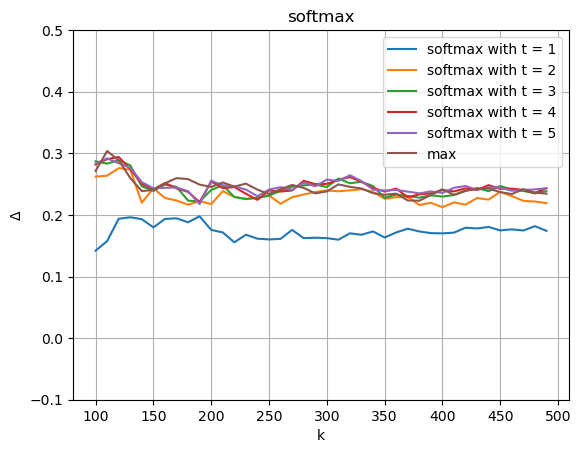

In [31]:
for t_i in range(num_t):
    t = t_arr[t_i]
    y = delta_softmax[t_i]
    plt.plot(k_list, y, label="softmax with t = {}".format(t))


plt.plot(k_list, delta_max, label="max")

plt.xlabel('k')
plt.ylabel('$\Delta$')
plt.ylim(-0.1, 0.5)
plt.title('softmax')
plt.legend()
plt.grid(True)
plt.show()

## softmax with bootstraping

In [19]:
t_fix = 10
xs = xs1
ys = np.log(np.exp(t_fix * xs1) + np.exp(t_fix * xs2))/t_fix

delta_softmax_fix = np.zeros(len(k_list))
delta_boot_softmax_fix = np.zeros([len(k_list), B])


for k_i in range(len(k_list)):
    k = k_list[k_i]
    delta_softmax_fix[k_i] = delta(xs, ys, k)
    for b in range(B):
        multi_b = np.random.exponential(scale=1.0, size=n)
        delta_boot_softmax_fix[k_i, b] = delta_boot(xs, ys, multi_b, k)


<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
/var/folders/4m/lbzt0vfd14gdl0qd39xm38g40000gn/T/ipykernel_73921/1367134299.py:11: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$')


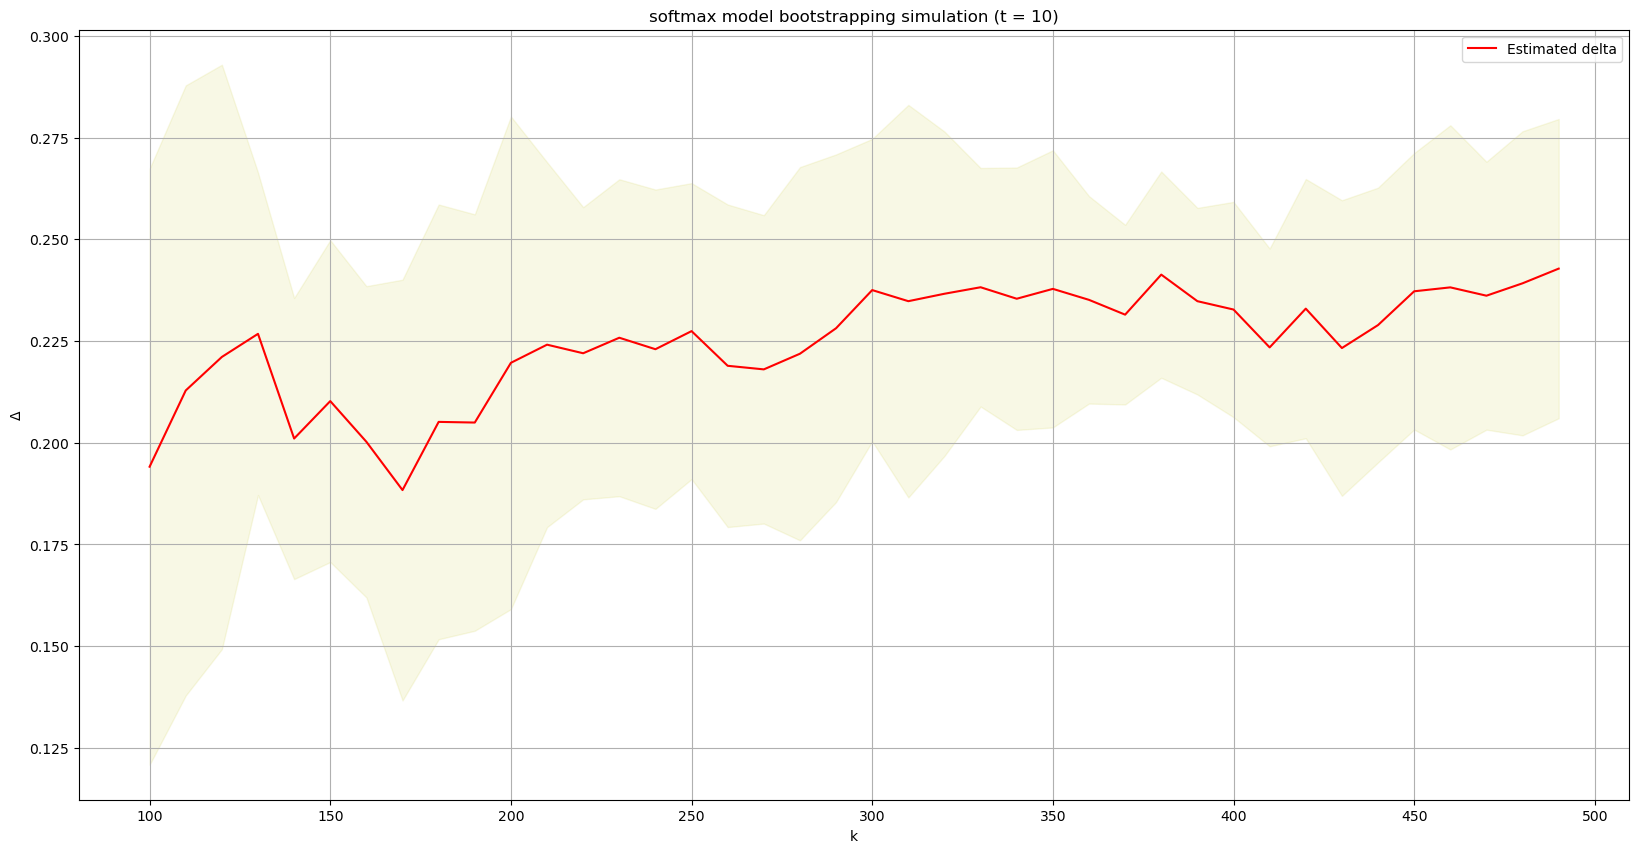

In [22]:
delta_boot_softmax_fix_sig = delta_boot_softmax_fix.std(1)
delta_boot_softmax_fix_upper = delta_softmax_fix + z * delta_boot_softmax_fix_sig
delta_boot_softmax_fix_lower = delta_softmax_fix - z * delta_boot_softmax_fix_sig

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(k_list, delta_softmax_fix, c="red", label="Estimated delta")
ax.fill_between(k_list, delta_boot_softmax_fix_upper, delta_boot_softmax_fix_lower, color="y", alpha=0.1)
ax.set_title('softmax model bootstrapping simulation (t = {})'.format(t_fix))

plt.xlabel('k')
plt.ylabel('$\Delta$')
plt.legend()
plt.grid(True)
plt.show()

## p-norm model with original data from standard normal

In [10]:
p_arr = [1, 2, 3, 4, 5]
num_p = len(p_arr)
xs1 = npr.randn(n)
xs2 = npr.randn(n)


delta_pnorm = np.zeros([num_p , num_k])

for p_i in range(num_p):
    p = p_arr[p_i]
    xs = np.abs(xs1)
    ys = (np.abs(xs1)**p + np.abs(xs2)**p)**(1/p)
    print("{}/{}".format(p_i+1, num_p))
    for k_i in range(num_k):
        k = k_list[k_i]
        delta_pnorm[p_i , k_i] = delta(xs, ys, k)
        print("{}/{}".format(k_i+1, num_k))


1/5
1/40
2/40
3/40
4/40
5/40
6/40
7/40
8/40
9/40
10/40
11/40
12/40
13/40
14/40
15/40
16/40
17/40
18/40
19/40
20/40
21/40
22/40
23/40
24/40
25/40
26/40
27/40
28/40
29/40
30/40
31/40
32/40
33/40
34/40
35/40
36/40
37/40
38/40
39/40
40/40
2/5
1/40
2/40
3/40
4/40
5/40
6/40
7/40
8/40
9/40
10/40
11/40
12/40
13/40
14/40
15/40
16/40
17/40
18/40
19/40
20/40
21/40
22/40
23/40
24/40
25/40
26/40
27/40
28/40
29/40
30/40
31/40
32/40
33/40
34/40
35/40
36/40
37/40
38/40
39/40
40/40
3/5
1/40
2/40
3/40
4/40
5/40
6/40
7/40
8/40
9/40
10/40
11/40
12/40
13/40
14/40
15/40
16/40
17/40
18/40
19/40
20/40
21/40
22/40
23/40
24/40
25/40
26/40
27/40
28/40
29/40
30/40
31/40
32/40
33/40
34/40
35/40
36/40
37/40
38/40
39/40
40/40
4/5
1/40
2/40
3/40
4/40
5/40
6/40
7/40
8/40
9/40
10/40
11/40
12/40
13/40
14/40
15/40
16/40
17/40
18/40
19/40
20/40
21/40
22/40
23/40
24/40
25/40
26/40
27/40
28/40
29/40
30/40
31/40
32/40
33/40
34/40
35/40
36/40
37/40
38/40
39/40
40/40
5/5
1/40
2/40
3/40
4/40
5/40
6/40
7/40
8/40
9/40
10/40
11/40

In [25]:
xs = np.abs(xs1)
ys = np.maximum(np.abs(xs1), np.abs(xs2))

delta_max =  np.zeros([num_k])
for k_i in range(num_k):
    k = k_list[k_i]
    delta_max[k_i] = delta(xs, ys, k)

<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
/var/folders/4m/lbzt0vfd14gdl0qd39xm38g40000gn/T/ipykernel_8955/966103781.py:10: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$')


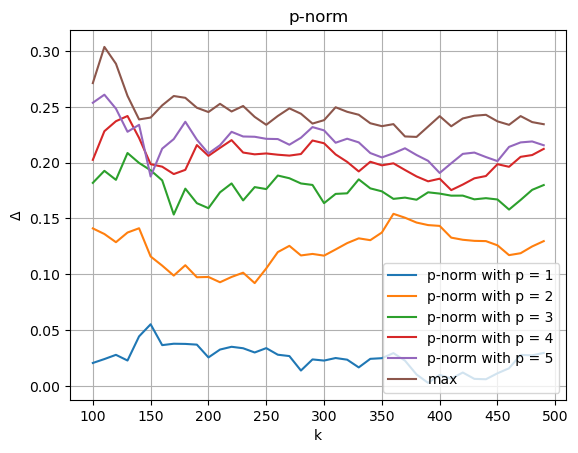

In [26]:
for p_i in range(num_p):
    p = p_arr[p_i]
    y = delta_pnorm[p_i]
    plt.plot(k_list, y, label="p-norm with p = {}".format(p))


plt.plot(k_list, delta_max, label="max")

plt.xlabel('k')
plt.ylabel('$\Delta$')
plt.title('p-norm')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
p_fix = 10
xs = np.abs(xs1)
ys = (np.abs(xs1)**p_fix + np.abs(xs2)**p_fix)**(1/p_fix)

delta_pnorm_fix = np.zeros(len(k_list))
delta_boot_pnorm_fix = np.zeros([len(k_list), B])


for k_i in range(len(k_list)):
    k = k_list[k_i]
    delta_pnorm_fix[k_i] = delta(xs, ys, k)
    for b in range(B):
        multi_b = np.random.exponential(scale=1.0, size=n)
        delta_boot_pnorm_fix[k_i, b] = delta_boot(xs, ys, multi_b, k)

<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
/var/folders/4m/lbzt0vfd14gdl0qd39xm38g40000gn/T/ipykernel_8955/1536739394.py:11: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$')


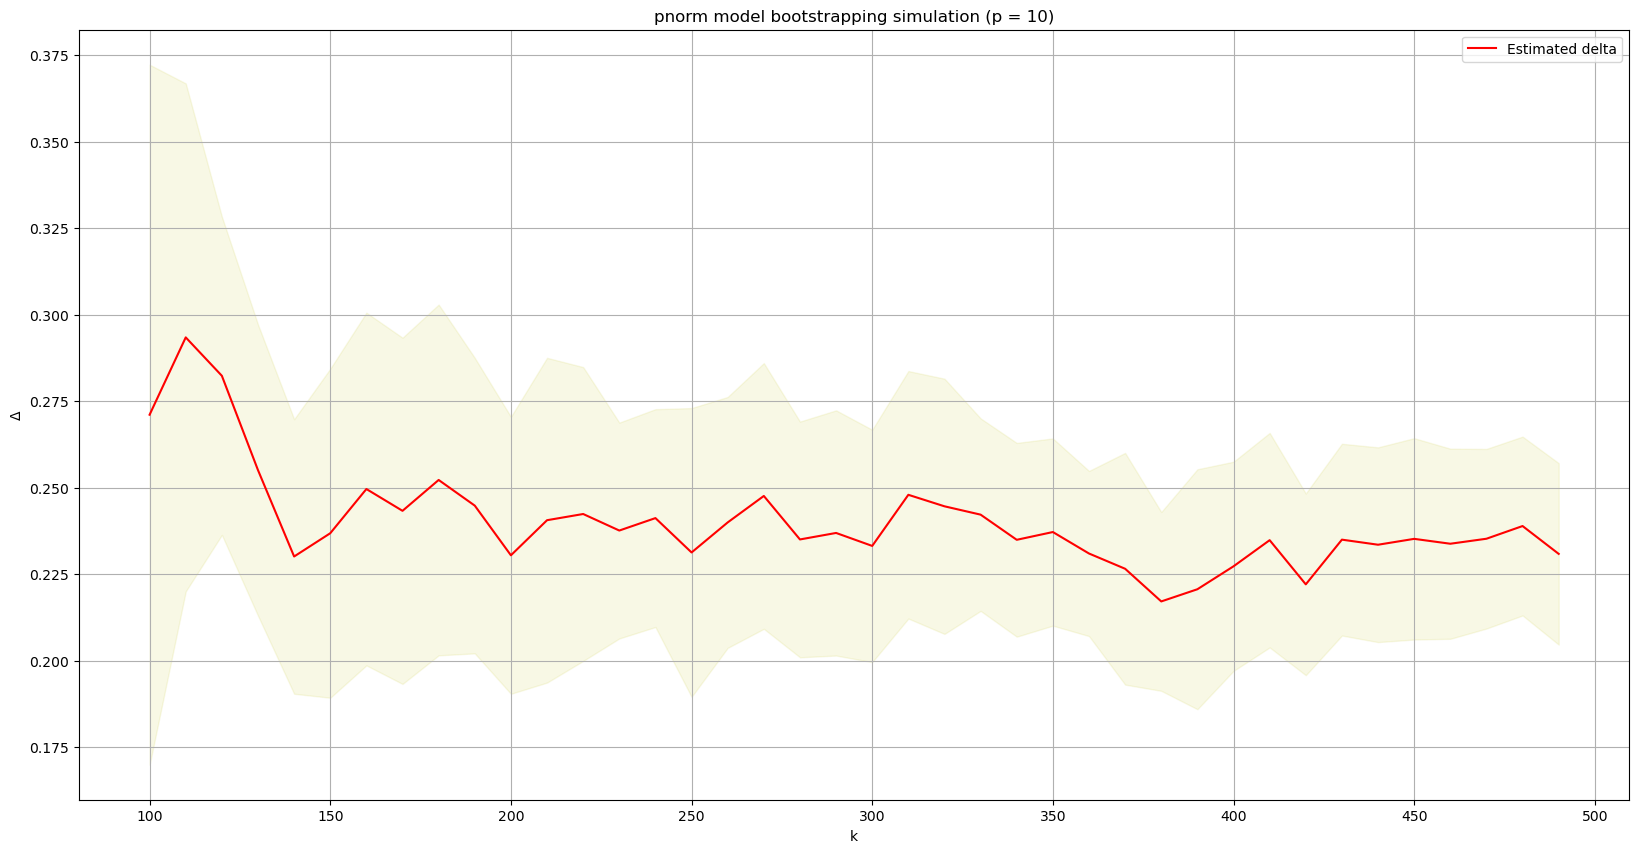

In [16]:
delta_boot_pnorm_fix_sig = delta_boot_pnorm_fix.std(1)
delta_boot_pnorm_fix_upper = delta_pnorm_fix + z * delta_boot_pnorm_fix_sig
delta_boot_pnorm_fix_lower = delta_pnorm_fix - z * delta_boot_pnorm_fix_sig

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(k_list, delta_pnorm_fix, c="red", label="Estimated delta")
ax.fill_between(k_list, delta_boot_pnorm_fix_upper, delta_boot_pnorm_fix_lower, color="y", alpha=0.1)
ax.set_title('pnorm model bootstrapping simulation (p = {})'.format(p_fix))

plt.xlabel('k')
plt.ylabel('$\Delta$')
plt.legend()
plt.grid(True)
plt.show()

<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\D'
/var/folders/4m/lbzt0vfd14gdl0qd39xm38g40000gn/T/ipykernel_8955/2556690770.py:27: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$')


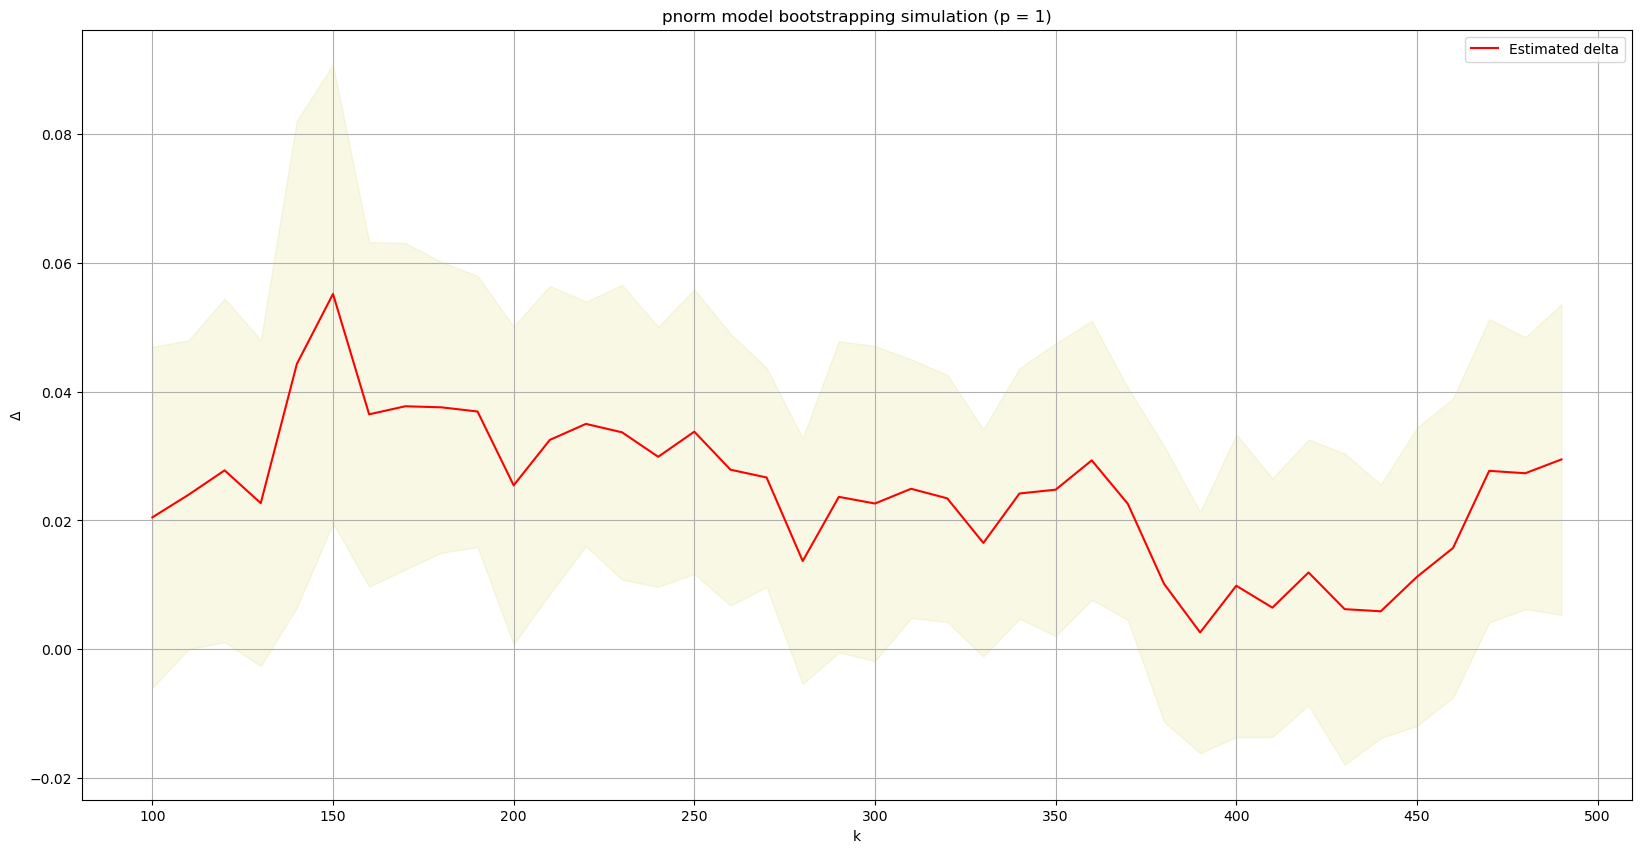

In [17]:
p_fix = 1
xs = np.abs(xs1)
ys = (np.abs(xs1)**p_fix + np.abs(xs2)**p_fix)**(1/p_fix)

delta_pnorm_fix = np.zeros(len(k_list))
delta_boot_pnorm_fix = np.zeros([len(k_list), B])


for k_i in range(len(k_list)):
    k = k_list[k_i]
    delta_pnorm_fix[k_i] = delta(xs, ys, k)
    for b in range(B):
        multi_b = np.random.exponential(scale=1.0, size=n)
        delta_boot_pnorm_fix[k_i, b] = delta_boot(xs, ys, multi_b, k)


delta_boot_pnorm_fix_sig = delta_boot_pnorm_fix.std(1)
delta_boot_pnorm_fix_upper = delta_pnorm_fix + z * delta_boot_pnorm_fix_sig
delta_boot_pnorm_fix_lower = delta_pnorm_fix - z * delta_boot_pnorm_fix_sig

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(k_list, delta_pnorm_fix, c="red", label="Estimated delta")
ax.fill_between(k_list, delta_boot_pnorm_fix_upper, delta_boot_pnorm_fix_lower, color="y", alpha=0.1)
ax.set_title('pnorm model bootstrapping simulation (p = {})'.format(p_fix))

plt.xlabel('k')
plt.ylabel('$\Delta$')
plt.legend()
plt.grid(True)
plt.show()

## bootstrapping for max model


<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\D'
/var/folders/4m/lbzt0vfd14gdl0qd39xm38g40000gn/T/ipykernel_8955/1369021307.py:27: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$')
/var/folders/4m/lbzt0vfd14gdl0qd39xm38g40000gn/T/ipykernel_8955/1369021307.py:27: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$')


ValueError: x and y must have same first dimension, but have shapes (40,) and (1,)

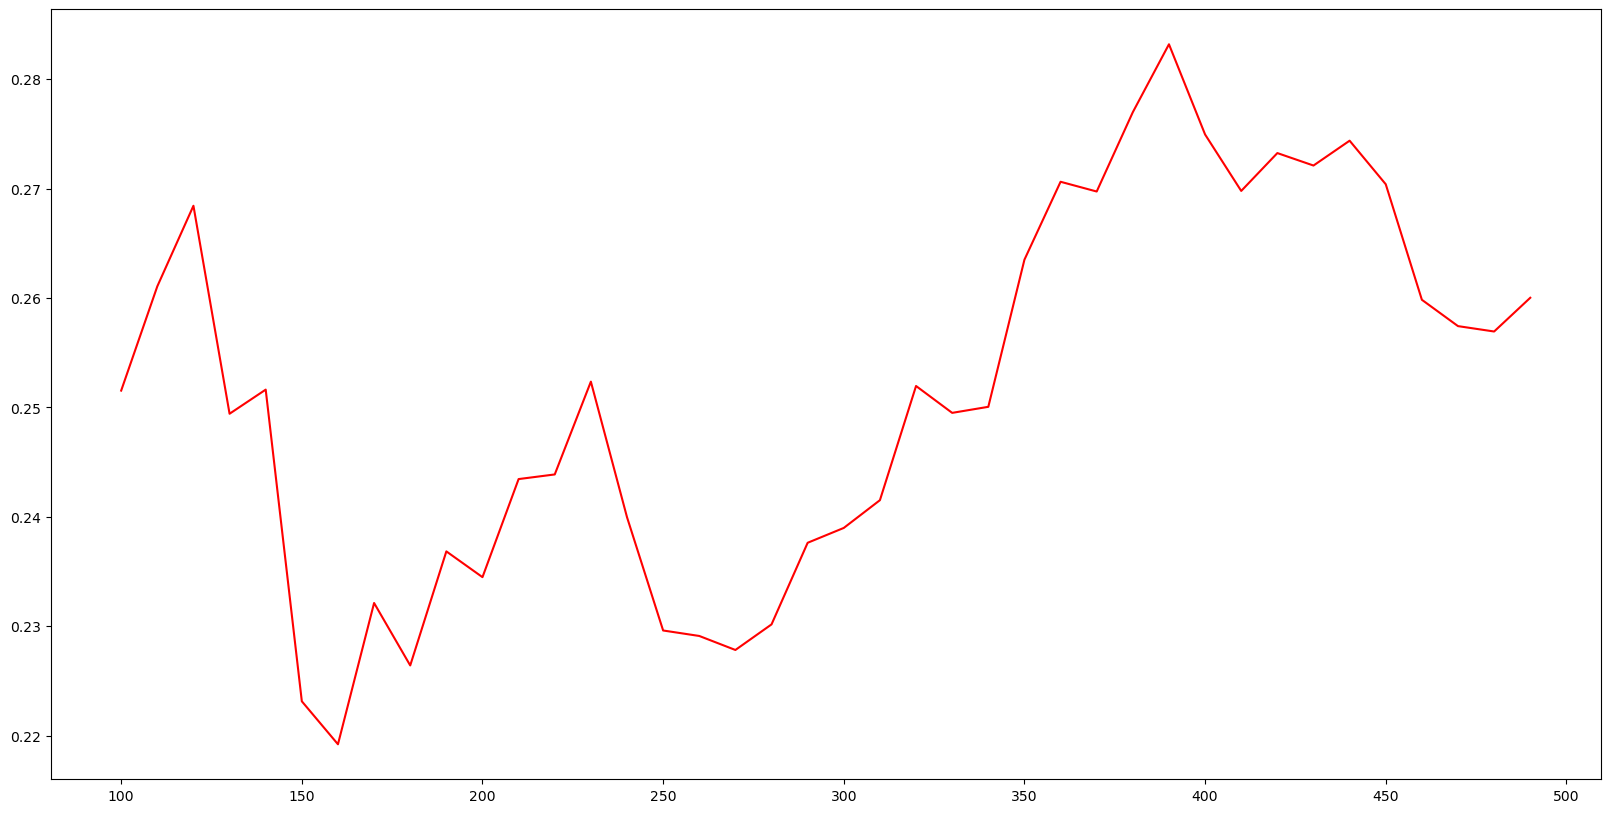

In [ ]:
xs = xs1
ys = np.maximum(xs1, xs2)

delta_max = np.zeros(len(k_list))
delta_boot_max = np.zeros([len(k_list), B])


for k_i in range(len(k_list)):
    k = k_list[k_i]
    delta_max[k_i] = delta(xs, ys, k)
    for b in range(B):
        multi_b = np.random.exponential(scale=1.0, size=n)
        delta_boot_max[k_i, b] = delta_boot(xs, ys, multi_b, k)


delta_boot_max_sig = delta_boot_max.std(1)
delta_boot_max_upper = delta_max + z * delta_boot_max_sig
delta_boot_max_lower = delta_max - z * delta_boot_max_sig



<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
/var/folders/4m/lbzt0vfd14gdl0qd39xm38g40000gn/T/ipykernel_8955/3571493565.py:8: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$')


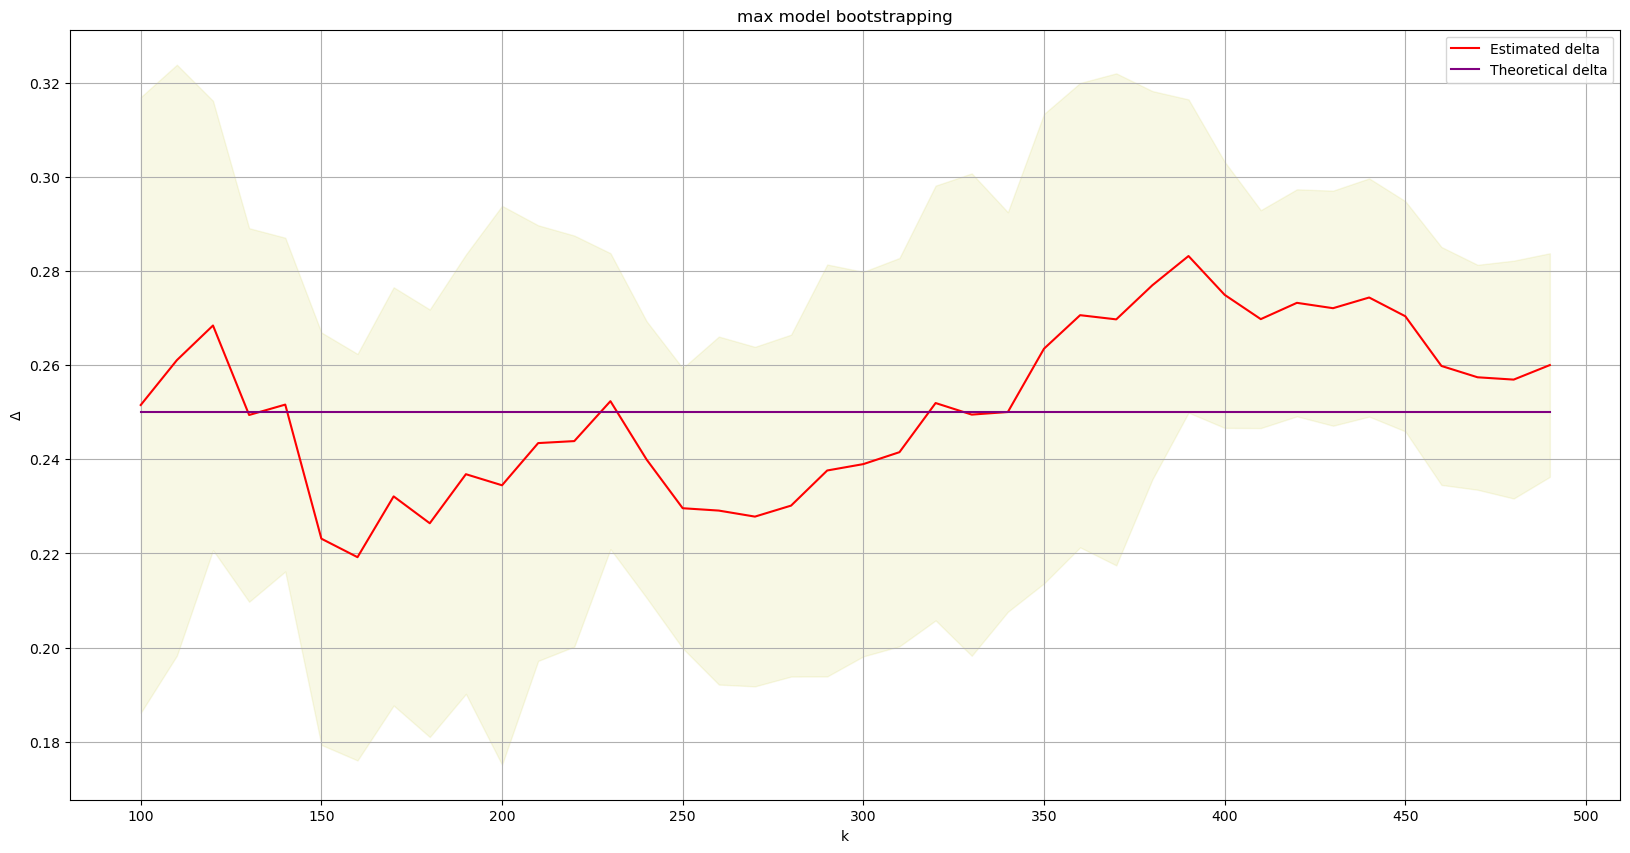

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(k_list, delta_max, c="red", label="Estimated delta")
ax.plot(k_list, 1/4 * np.ones_like(k_list), c="purple", label="Theoretical delta")
ax.fill_between(k_list, delta_boot_max_upper, delta_boot_max_lower, color="y", alpha=0.1)
ax.set_title('max model bootstrapping')

plt.xlabel('k')
plt.ylabel('$\Delta$')
plt.legend()
plt.grid(True)
plt.show()